In [1]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import matplotlib.dates as mdate
import datetime as dt

In [2]:
#Parse data for closing price + volume, rsi
stock_pd = pd.read_csv("apple_raw.csv")
rsi_pd = pd.read_csv("apple_raw_rsi.csv")

In [3]:
stock_pd.head(2)

,timestamp,open,high,low,close,volume
0,2000-01-03,104.87,112.50,101.69,111.94,4783900
1,2000-01-04,108.25,110.62,101.19,102.50,4574800


In [4]:
rsi_pd.head(2)

,timestamp,RSI
0,2000-03-29,54.8434
1,2000-03-30,52.6416


In [5]:
#Verify column datatypes
print(stock_pd.dtypes)

timestamp     object
open         float64
high         float64
low          float64
close        float64
volume         int64
dtype: object


In [6]:
# Drop open, high, low from dataset, parse timestamps and reset index
   # Keep volume - do not drop
stock_pd = pd.read_csv('apple_raw.csv',parse_dates=['timestamp'])
stock_pd = stock_pd.sort_values(by='timestamp')
stock_pd.drop(['open','high','low'],axis = 1, inplace = True)
    
stock_pd.set_index('timestamp',inplace=True)

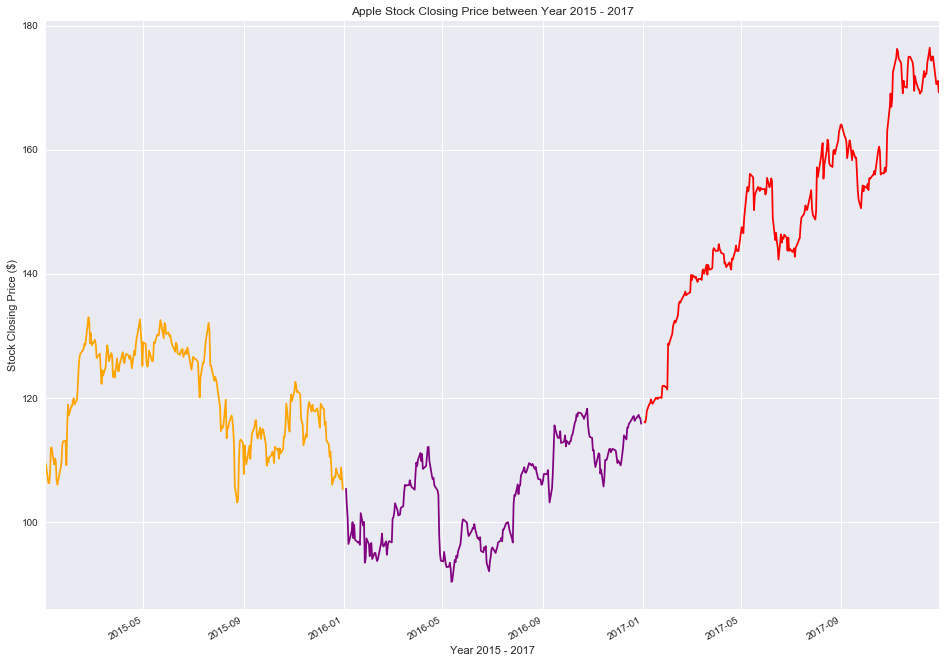

In [7]:
# Create Multi-year color chart closing price for three year range:

stock_2017 = stock_pd.truncate(before=str('2017-01-01'), after=str('2017-12-31'))
stock_2016 = stock_pd.truncate(before=str('2016-01-01'), after=str('2016-12-31'))
stock_2015 = stock_pd.truncate(before=str('2015-01-01'), after=str('2015-12-31'))

stock_2017['close'].plot(figsize=(16, 12), color="red")
stock_2016['close'].plot(figsize=(16, 12), color="purple")
stock_2015['close'].plot(figsize=(16, 12), color="orange")

plt.title("Apple Stock Closing Price between Year 2015 - 2017")
plt.xlabel("Year 2015 - 2017")
plt.ylabel("Stock Closing Price ($)")
plt.show()

In [8]:
# Parse timestamps, reset index to three year range for RSI values:

rsi_pd1 = rsi_pd.sort_values(by='timestamp')
rsi_pd2 = rsi_pd.sort_values(by='timestamp')
rsi_pd3 = rsi_pd.sort_values(by='timestamp')

rsi_pd1.set_index('timestamp', inplace=True)
rsi_pd2.set_index('timestamp', inplace=True)
rsi_pd3.set_index('timestamp', inplace=True)

rsi_2017=rsi_pd1.truncate(before=str('2017-01-01'), after=str('2017-12-31'))
rsi_2016=rsi_pd2.truncate(before=str('2016-01-01'), after=str('2016-12-31'))
rsi_2015=rsi_pd3.truncate(before=str('2015-01-01'), after=str('2015-12-31'))

In [9]:
rsi_2017.head()

,RSI
timestamp,
2017-01-03,55.3174
2017-01-04,55.1781
2017-01-05,55.6929
2017-01-06,56.8044
2017-01-09,57.7009


In [10]:
stock_2017.head()

,close,volume
timestamp,,
2017-01-03,116.15,28781865
2017-01-04,116.02,21118116
2017-01-05,116.61,22193587
2017-01-06,117.91,31751900
2017-01-09,118.99,33561948


In [11]:
# Merge RSI values into close + volume price into dataframe
stock_2017=stock_2017.join(rsi_2017, how= 'inner')
stock_2016=stock_2016.join(rsi_2016, how= 'inner')
stock_2015=stock_2015.join(rsi_2015, how= 'inner')

In [12]:
stock_2015.head()

,close,volume,RSI
timestamp,,,
2015-01-02,109.33,53204626,36.2704
2015-01-05,106.25,64285491,35.4623
2015-01-06,106.26,65797116,35.4671
2015-01-07,107.75,40105934,36.1784
2015-01-08,111.89,59364547,38.1060


In [13]:
# Flat multi-variate linear regression test for price prediction
# Reference/source: 
    # https://enlight.nyc/stock-market-prediction

In [14]:
forecast_out = int(30)

# predictions shifted 30 days/units up/backwards:
    # pandas shift() function, negative value used
stock_2015['prediction'] = stock_2015[['close']].shift(-forecast_out)

stock_2015.head()

,close,volume,RSI,prediction
timestamp,,,,
2015-01-02,109.33,53204626,36.2704,127.830
2015-01-05,106.25,64285491,35.4623,128.715
2015-01-06,106.26,65797116,35.4671,128.450
2015-01-07,107.75,40105934,36.1784,129.495
2015-01-08,111.89,59364547,38.1060,133.000


In [15]:
# Verifying shift on tail end of dataset (NaN values should be present)
stock_2015.tail()

,close,volume,RSI,prediction
timestamp,,,,
2015-12-24,108.03,13596680,45.1011,NaN
2015-12-28,106.82,26704210,44.4940,NaN
2015-12-29,108.74,30931243,45.6741,NaN
2015-12-30,107.32,25213777,44.9553,NaN
2015-12-31,105.26,40912316,43.9351,NaN


In [16]:
# Drop rows/last 30 day shift with NaN values
stock_2015.dropna(inplace=True)
# Verify NaN drop of rows
stock_2015.tail()

,close,volume,RSI,prediction
timestamp,,,,
2015-11-11,116.110,45217971,48.7008,108.03
2015-11-12,115.720,32525579,48.4972,106.82
2015-11-13,112.340,45812403,46.7735,108.74
2015-11-16,114.175,38106701,47.7978,107.32
2015-11-17,113.690,27583101,47.5519,105.26


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing, cross_validation, svm

C:\Users\tyu-dev\Anaconda3\envs\pythondata\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
# Set input features (X) and predictor value (y)
    # close, volume, RSI = X (predictor values)
    # prediction = y (predicted value)
X = np.array(stock_2015.drop(['prediction'], 1))
y = np.array(stock_2015['prediction'])

In [19]:
# Scale input features/X 
    # test_size to 20% of data

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, random_state=1, test_size = 0.25)

In [20]:
X_scaler = StandardScaler().fit(X_train)

In [21]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [22]:
clf = LinearRegression()
clf.fit(X_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
confidence = clf.score(X_test_scaled, y_test)
print("confidence: ", confidence)

confidence:  0.49203865306004047


In [24]:
forecast_prediction = clf.predict(X_train_scaled)
print(forecast_prediction)

[114.91070339 123.08633492 112.59800333 123.04495839 113.51909425
 120.81432919 112.18404489 122.39689981 122.37923883 124.07545643
 123.52524523 112.6256775  123.46822957 122.16795893 125.51269486
 113.73849871 124.72645743 123.88498652 114.01437081 124.9388922
 121.13845289 123.91453183 117.22620307 113.17512977 113.01999494
 112.9899834  125.11797117 121.92342861 127.57547073 116.51982907
 122.86587181 124.37433199 114.46014845 124.14263693 124.19476957
 114.01956751 122.98972305 124.87913934 115.88013806 123.41238129
 111.5462356  123.62455071 123.11473108 113.61786571 123.04083843
 120.46535082 125.15821331 120.60748307 123.35104198 114.69275844
 113.04316807 115.0586651  122.73314616 122.28857764 122.73568834
 112.78110115 125.25436329 113.62326931 123.05070659 123.38925319
 122.66105965 113.63118416 124.36116438 112.82394355 123.50554542
 125.19046807 115.10362573 112.07339996 114.47894499 122.59251316
 123.75107454 112.96056587 121.11599385 113.51131208 115.66192206
 126.736518

In [25]:
forecast_prediction_pd = pd.DataFrame(data=forecast_prediction, columns=['forecasted'])

In [26]:
forecast_prediction_pd.head()

,forecasted
0,114.910703
1,123.086335
2,112.598003
3,123.044958
4,113.519094


In [27]:
stock_2015.head()

,close,volume,RSI,prediction
timestamp,,,,
2015-01-02,109.33,53204626,36.2704,127.830
2015-01-05,106.25,64285491,35.4623,128.715
2015-01-06,106.26,65797116,35.4671,128.450
2015-01-07,107.75,40105934,36.1784,129.495
2015-01-08,111.89,59364547,38.1060,133.000


In [28]:
stock_2015.index.size

222

In [29]:
forecast_prediction_pd.index.size

166

In [30]:
forecast_prediction_pd.reset_index(inplace=True)
#stock_2015['forecasted'] = forecast_prediction_pd['forecasted'].values

In [31]:
stock_2015.head()

,close,volume,RSI,prediction
timestamp,,,,
2015-01-02,109.33,53204626,36.2704,127.830
2015-01-05,106.25,64285491,35.4623,128.715
2015-01-06,106.26,65797116,35.4671,128.450
2015-01-07,107.75,40105934,36.1784,129.495
2015-01-08,111.89,59364547,38.1060,133.000


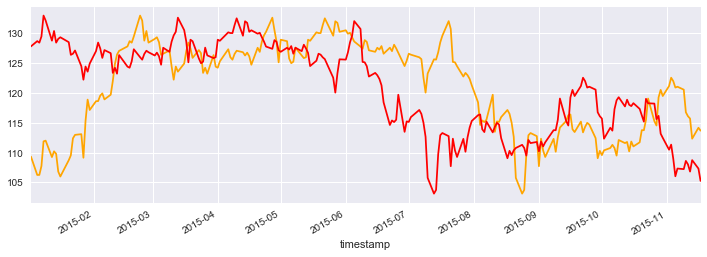

In [37]:
stock_2015['close'].plot(figsize=(12, 4), color="orange")
stock_2015['prediction'].plot(figsize=(12, 4), color="red")
plt.show()

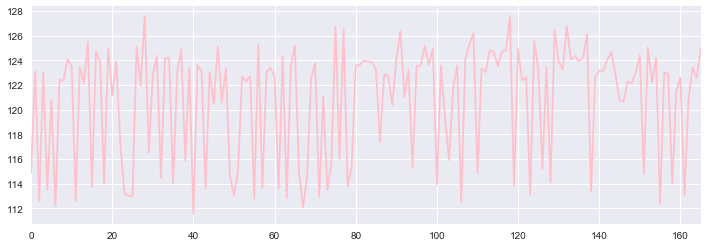

In [36]:
forecast_prediction_pd['forecasted'].plot(figsize=(12, 4), color="pink")
plt.show()